<center><h1>Sonawane_Devashish_HW4</h1></center>
<br>
<br>

Name: Devashish Sonawane
<br>
Github Username: Devashish-Sonawane
<br>
USC ID: 3445574607

## Note: I am using my 1st Late Day for this HomeWork.

## 1. Time Series Classification Part 1: Feature Creation/Extraction (HW3 Rerun)

### (a) Obtain Data

Import packages

In [1]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn import metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

Get the AReM Data Set

In [2]:
# Paths to folder of each category
base_paths = {
    'bending1': '../data/AReM/bending1/',
    'bending2': '../data/AReM/bending2/',
    'cycling': '../data/AReM/cycling/',
    'lying': '../data/AReM/lying/',
    'sitting': '../data/AReM/sitting/',
    'standing': '../data/AReM/standing/',
    'walking': '../data/AReM/walking/',
}

# Ranges for datasets to split between Training and Test
test_files = {
    'bending1': range(1, 3),
    'bending2': range(1, 3),
    'lying': range(1, 4),
    'sitting': range(1, 4),
    'standing': range(1, 4),
    'walking': range(1, 4),
    'cycling': range(1, 4),
}

train_files = {
    'bending1': range(3, 8),
    'bending2': range(3, 7),
    'lying': range(4, 16),
    'sitting': range(4, 16),
    'standing': range(4, 16),
    'walking': range(4, 16),
    'cycling': range(4, 16),
}

# Func to split train and test data
def file_paths(activity, file_range):
    return [f"{base_paths[activity]}dataset{num}.csv" for num in file_range]

### (b) Splitting Data

In [3]:
# Generating test and train datasets using the func
test = {activity: file_paths(activity, test_files[activity]) for activity in test_files}
train = {activity: file_paths(activity, train_files[activity]) for activity in train_files}

print("Test Datasets:", test)
print("Train Datasets:", train)

Test Datasets: {'bending1': ['../data/AReM/bending1/dataset1.csv', '../data/AReM/bending1/dataset2.csv'], 'bending2': ['../data/AReM/bending2/dataset1.csv', '../data/AReM/bending2/dataset2.csv'], 'lying': ['../data/AReM/lying/dataset1.csv', '../data/AReM/lying/dataset2.csv', '../data/AReM/lying/dataset3.csv'], 'sitting': ['../data/AReM/sitting/dataset1.csv', '../data/AReM/sitting/dataset2.csv', '../data/AReM/sitting/dataset3.csv'], 'standing': ['../data/AReM/standing/dataset1.csv', '../data/AReM/standing/dataset2.csv', '../data/AReM/standing/dataset3.csv'], 'walking': ['../data/AReM/walking/dataset1.csv', '../data/AReM/walking/dataset2.csv', '../data/AReM/walking/dataset3.csv'], 'cycling': ['../data/AReM/cycling/dataset1.csv', '../data/AReM/cycling/dataset2.csv', '../data/AReM/cycling/dataset3.csv']}
Train Datasets: {'bending1': ['../data/AReM/bending1/dataset3.csv', '../data/AReM/bending1/dataset4.csv', '../data/AReM/bending1/dataset5.csv', '../data/AReM/bending1/dataset6.csv', '../da

### (c) Feature Extraction

In [4]:
# This func will generate headers in Dataframe
def col_names(num_features):
    cols = []
    for i in range(num_features):
        cols.extend([
            f'Min_{i + 1}',
            f'Max_{i + 1}',
            f'Mean_{i + 1}',
            f'Median_{i + 1}',
            f'Q1_{i + 1}',
            f'Q3_{i + 1}',
            f'Std_{i + 1}'
        ])
    return cols

# This func will read file and calculate statistical data
def features(data):
    time_features = {}
    num_features = 6
    column_names = col_names(num_features)

    for key, value in data.items():
        for path in value:
            df = pd.read_csv(path, skiprows=5, header=None)
            df.columns = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
            row = []
            for i in range(1, len(df.columns)):
                arr = df.iloc[:, i].to_numpy()

                # I am using numpy to calculate
                row.extend([
                    round(np.min(arr), 2),
                    round(np.max(arr), 2),
                    round(np.mean(arr), 2),
                    round(np.median(arr), 2),
                    round(np.quantile(arr, 0.25), 2),
                    round(np.quantile(arr, 0.75), 2),
                    round(np.std(arr), 2)
                ])

            # Creating key from  file path
            a = path.split('/')
            b = f"{a[3]}/{a[4]}"
            time_features[b] = row

    # Saving as Dataframe
    feature_df = pd.DataFrame.from_dict(time_features, orient='index')
    feature_df.columns = column_names
    
    # Resetting index
    feature_df.reset_index(inplace=True)
    feature_df.rename(columns={'index': 'File'}, inplace=True)
    return feature_df

In [5]:
train_df = features(train)
train_df

,File,Min_1,Max_1,Mean_1,Median_1,Q1_1,Q3_1,Std_1,Min_2,Max_2,...,Q1_5,Q3_5,Std_5,Min_6,Max_6,Mean_6,Median_6,Q1_6,Q3_6,Std_6
0,bending1/dataset3.csv,35.00,47.40,43.95,44.33,43.00,45.00,1.56,0.0,1.70,...,35.36,36.50,2.00,0.0,1.79,0.49,0.43,0.00,0.94,0.51
1,bending1/dataset4.csv,33.00,47.75,42.18,43.50,39.15,45.00,3.67,0.0,3.00,...,30.46,36.33,3.85,0.0,2.18,0.61,0.50,0.00,1.00,0.52
2,bending1/dataset5.csv,33.00,45.75,41.68,41.75,41.33,42.75,2.24,0.0,2.83,...,28.46,31.25,2.41,0.0,1.79,0.38,0.43,0.00,0.50,0.39
3,bending1/dataset6.csv,37.00,48.00,43.45,43.25,42.50,45.00,1.38,0.0,1.58,...,22.25,24.00,2.49,0.0,5.26,0.68,0.50,0.43,0.87,0.62
4,bending1/dataset7.csv,36.25,48.00,43.97,44.50,43.31,44.67,1.62,0.0,1.50,...,20.50,23.75,3.31,0.0,2.96,0.56,0.49,0.00,0.83,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,cycling/dataset11.csv,27.00,44.33,36.54,36.00,33.25,39.81,4.01,0.0,10.43,...,15.00,19.50,3.08,0.0,9.18,3.23,2.87,1.88,4.26,1.77
65,cycling/dataset12.csv,18.50,44.25,35.75,36.00,33.00,39.33,4.61,0.0,12.60,...,14.00,18.06,3.12,0.0,9.39,3.07,2.77,1.80,4.06,1.75
66,cycling/dataset13.csv,19.00,43.75,35.88,36.00,33.00,39.50,4.61,0.0,11.20,...,14.75,19.69,3.53,0.0,8.50,3.09,2.93,1.89,4.06,1.62
67,cycling/dataset14.csv,23.33,43.50,36.24,36.75,33.46,39.25,3.82,0.0,9.71,...,15.75,21.00,3.61,0.0,11.15,3.53,3.11,2.17,4.62,1.96


In [6]:
test_df = features(test)
test_df

,File,Min_1,Max_1,Mean_1,Median_1,Q1_1,Q3_1,Std_1,Min_2,Max_2,...,Q1_5,Q3_5,Std_5,Min_6,Max_6,Mean_6,Median_6,Q1_6,Q3_6,Std_6
0,bending1/dataset1.csv,37.25,45.00,40.62,40.50,39.25,42.00,1.48,0.0,1.30,...,33.00,36.00,2.19,0.0,1.92,0.57,0.43,0.00,1.30,0.58
1,bending1/dataset2.csv,38.00,45.67,42.81,42.50,42.00,43.67,1.43,0.0,1.22,...,32.00,34.50,1.99,0.0,3.11,0.57,0.43,0.00,1.30,0.60
2,bending2/dataset1.csv,12.75,51.00,24.56,24.25,23.19,26.50,3.73,0.0,6.87,...,20.50,27.00,3.69,0.0,4.97,0.70,0.50,0.43,0.87,0.69
3,bending2/dataset2.csv,0.00,42.75,27.46,28.00,25.50,30.00,3.58,0.0,7.76,...,15.00,20.75,5.05,0.0,6.76,1.12,0.83,0.47,1.30,1.01
4,lying/dataset1.csv,23.50,30.00,27.72,27.50,27.00,29.00,1.44,0.0,1.79,...,5.50,10.75,4.07,0.0,4.50,0.73,0.71,0.43,1.00,0.61
5,lying/dataset2.csv,24.75,48.33,44.18,48.00,48.00,48.00,7.49,0.0,3.11,...,2.00,5.54,3.27,0.0,3.91,0.69,0.50,0.32,0.94,0.68
6,lying/dataset3.csv,48.00,48.25,48.00,48.00,48.00,48.00,0.03,0.0,0.43,...,4.67,10.00,3.27,0.0,2.50,0.64,0.50,0.46,0.83,0.39
7,sitting/dataset1.csv,33.25,48.00,42.36,43.00,42.00,43.50,2.07,0.0,4.44,...,10.19,17.69,4.95,0.0,6.02,1.03,0.83,0.47,1.25,0.98
8,sitting/dataset2.csv,37.00,50.75,45.92,45.64,45.00,46.50,1.09,0.0,4.87,...,16.50,21.00,3.58,0.0,7.22,0.90,0.71,0.43,1.12,0.90
9,sitting/dataset3.csv,44.50,46.75,45.24,45.00,45.00,45.33,0.43,0.0,1.00,...,17.63,21.00,2.94,0.0,8.20,0.84,0.71,0.43,1.12,0.83


## 2. Time Series Classification Part 2: Binary and Multiclass Classification

### (a) Binary Classification Using Logistic Regression

#### i. Plots

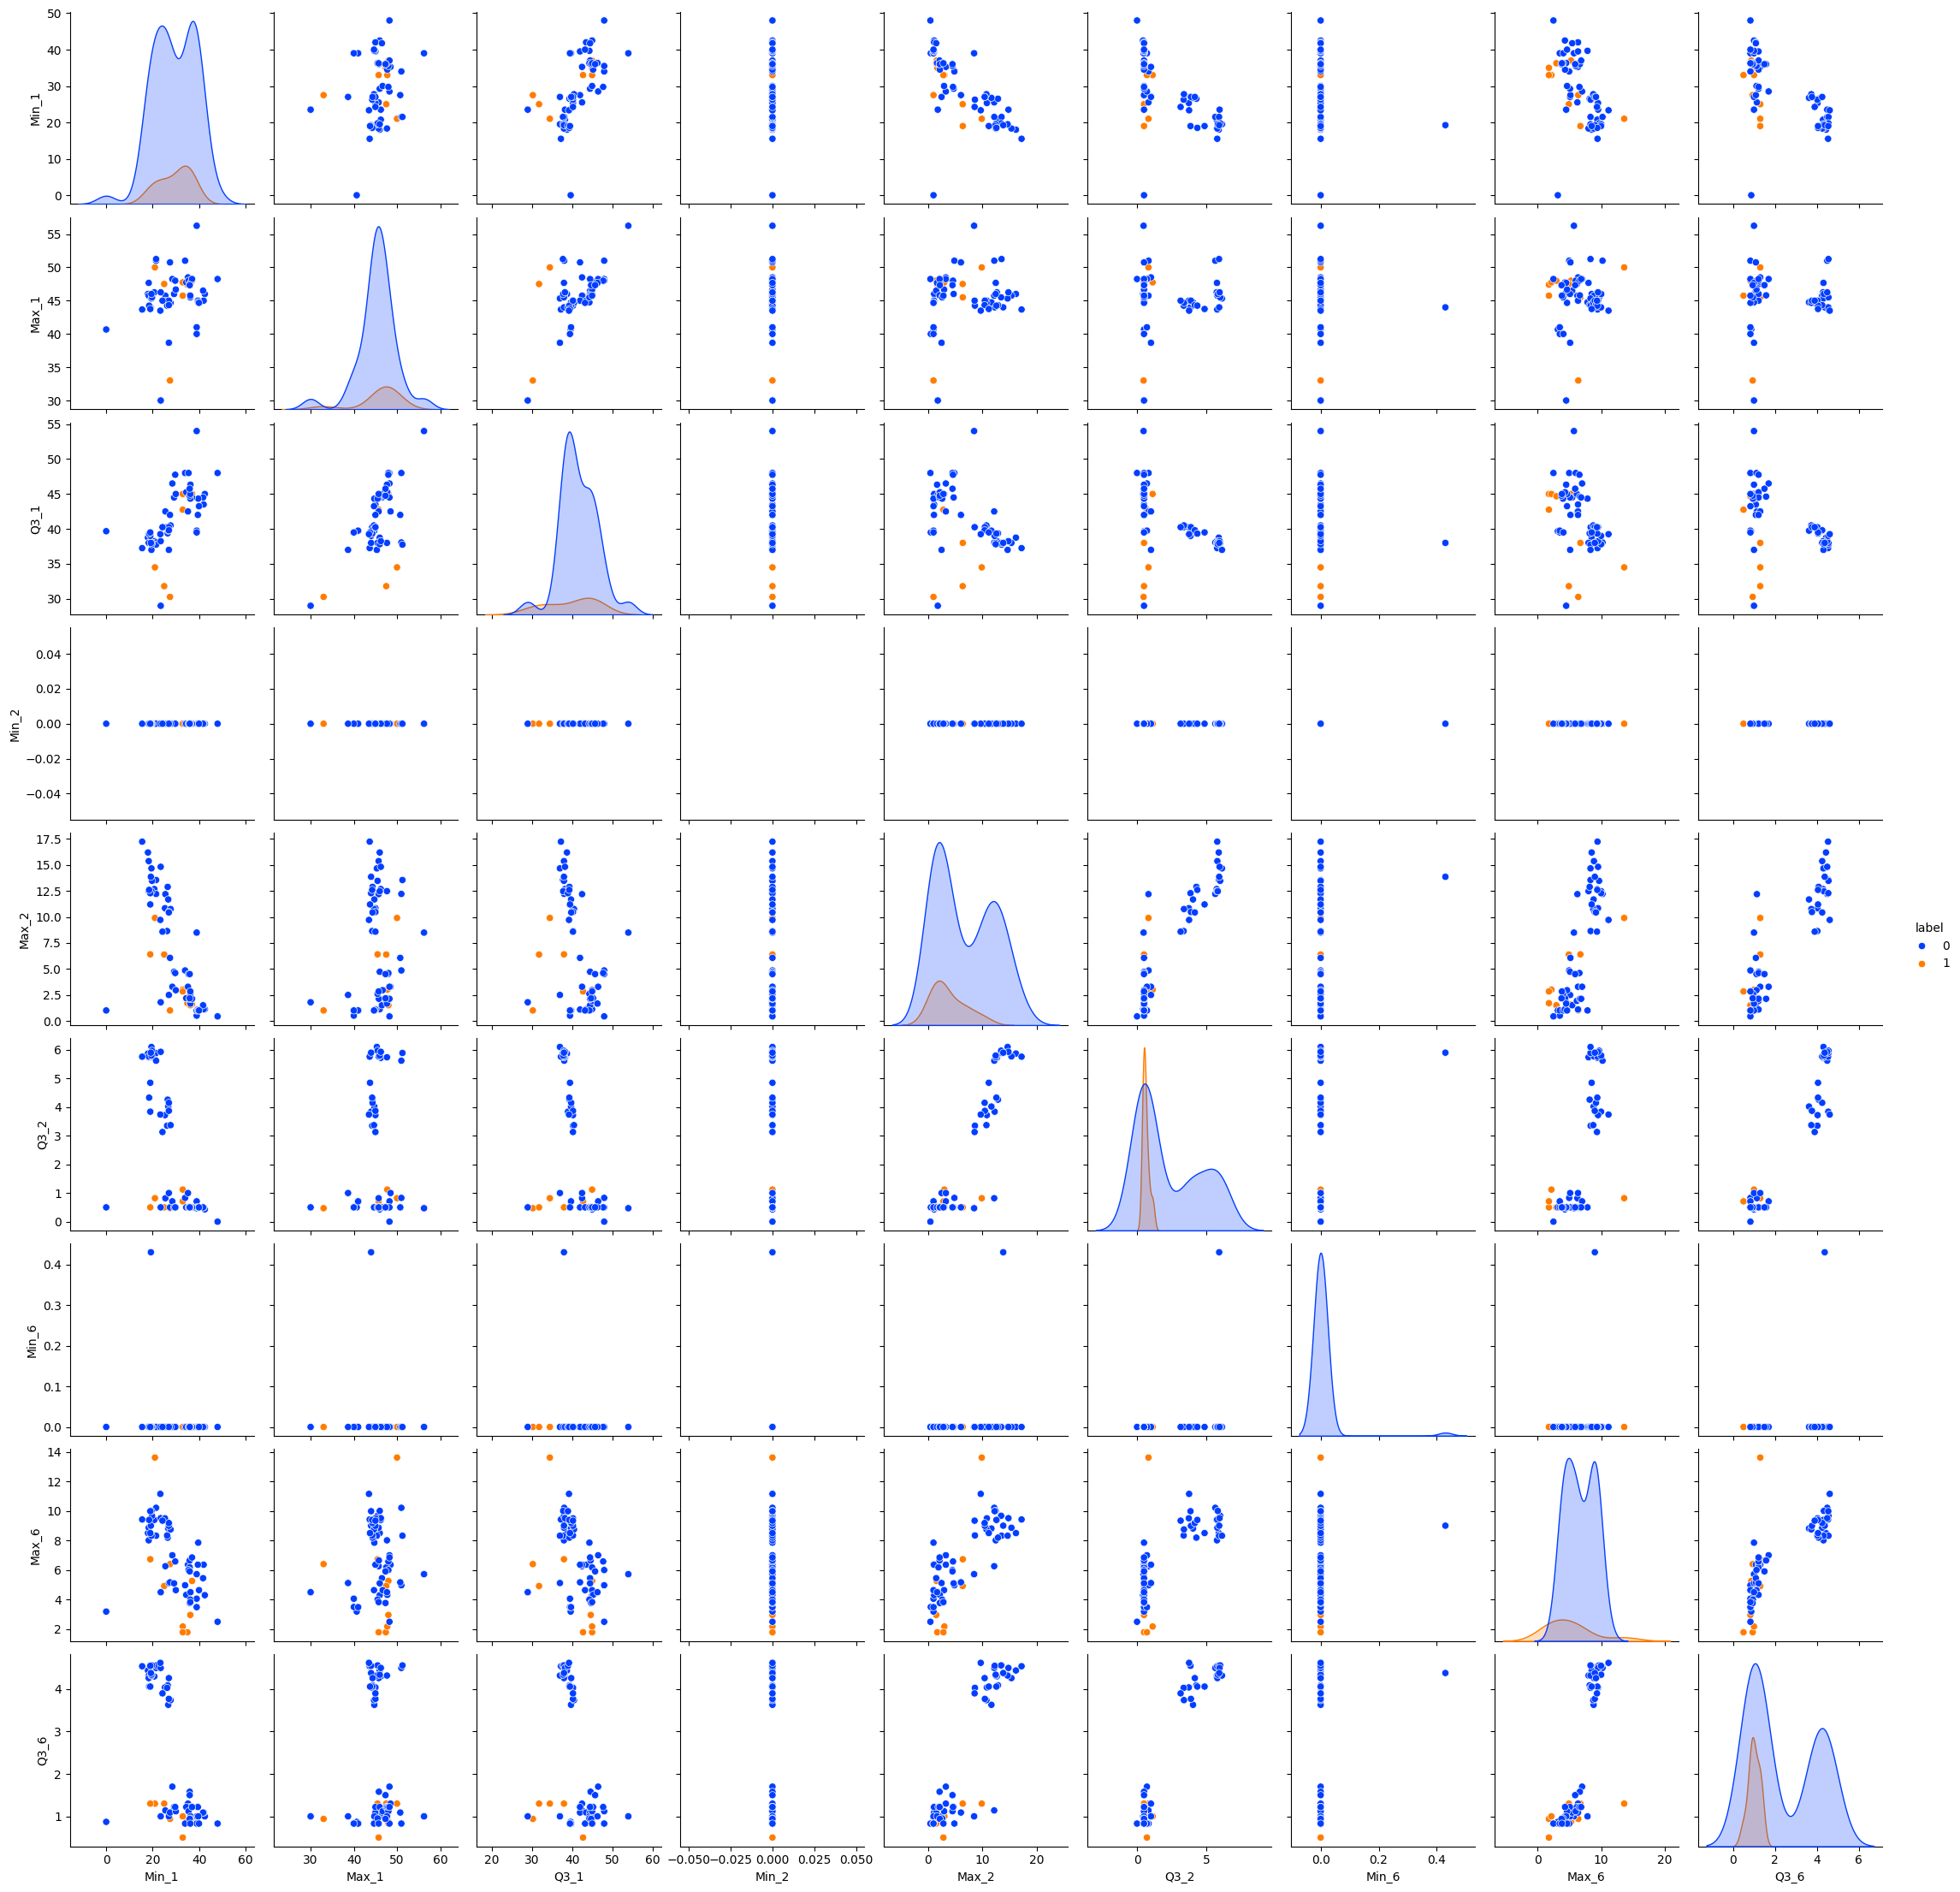

In [7]:
cols_temp = ['Min_1', 'Max_1', 'Q3_1', 'Min_2', 'Max_2', 'Q3_2', 'Min_6', 'Max_6', 'Q3_6'] # Names of interested features
tr_bend_df = train_df[cols_temp].copy()
tr_bend_df.loc[:, 'label'] = 0

for ind, row in tr_bend_df.iterrows():      # Finding the label in File column
    if 'bending1' in train_df.at[ind, 'File'] or 'bending2' in train_df.at[ind, 'File']:
        tr_bend_df.loc[ind, 'label'] = 1

sns.pairplot(tr_bend_df, hue='label', palette='bright')     # plot
plt.show()

In [8]:
tr_bend_df

,Min_1,Max_1,Q3_1,Min_2,Max_2,Q3_2,Min_6,Max_6,Q3_6,label
0,35.00,47.40,45.00,0.0,1.70,0.50,0.0,1.79,0.94,1
1,33.00,47.75,45.00,0.0,3.00,1.12,0.0,2.18,1.00,1
2,33.00,45.75,42.75,0.0,2.83,0.71,0.0,1.79,0.50,1
3,37.00,48.00,45.00,0.0,1.58,0.50,0.0,5.26,0.87,1
4,36.25,48.00,44.67,0.0,1.50,0.50,0.0,2.96,0.83,1
...,...,...,...,...,...,...,...,...,...,...
64,27.00,44.33,39.81,0.0,10.43,4.15,0.0,9.18,4.26,0
65,18.50,44.25,39.33,0.0,12.60,4.33,0.0,9.39,4.06,0
66,19.00,43.75,39.50,0.0,11.20,4.85,0.0,8.50,4.06,0
67,23.33,43.50,39.25,0.0,9.71,3.74,0.0,11.15,4.62,0


#### ii. Splitted Plots

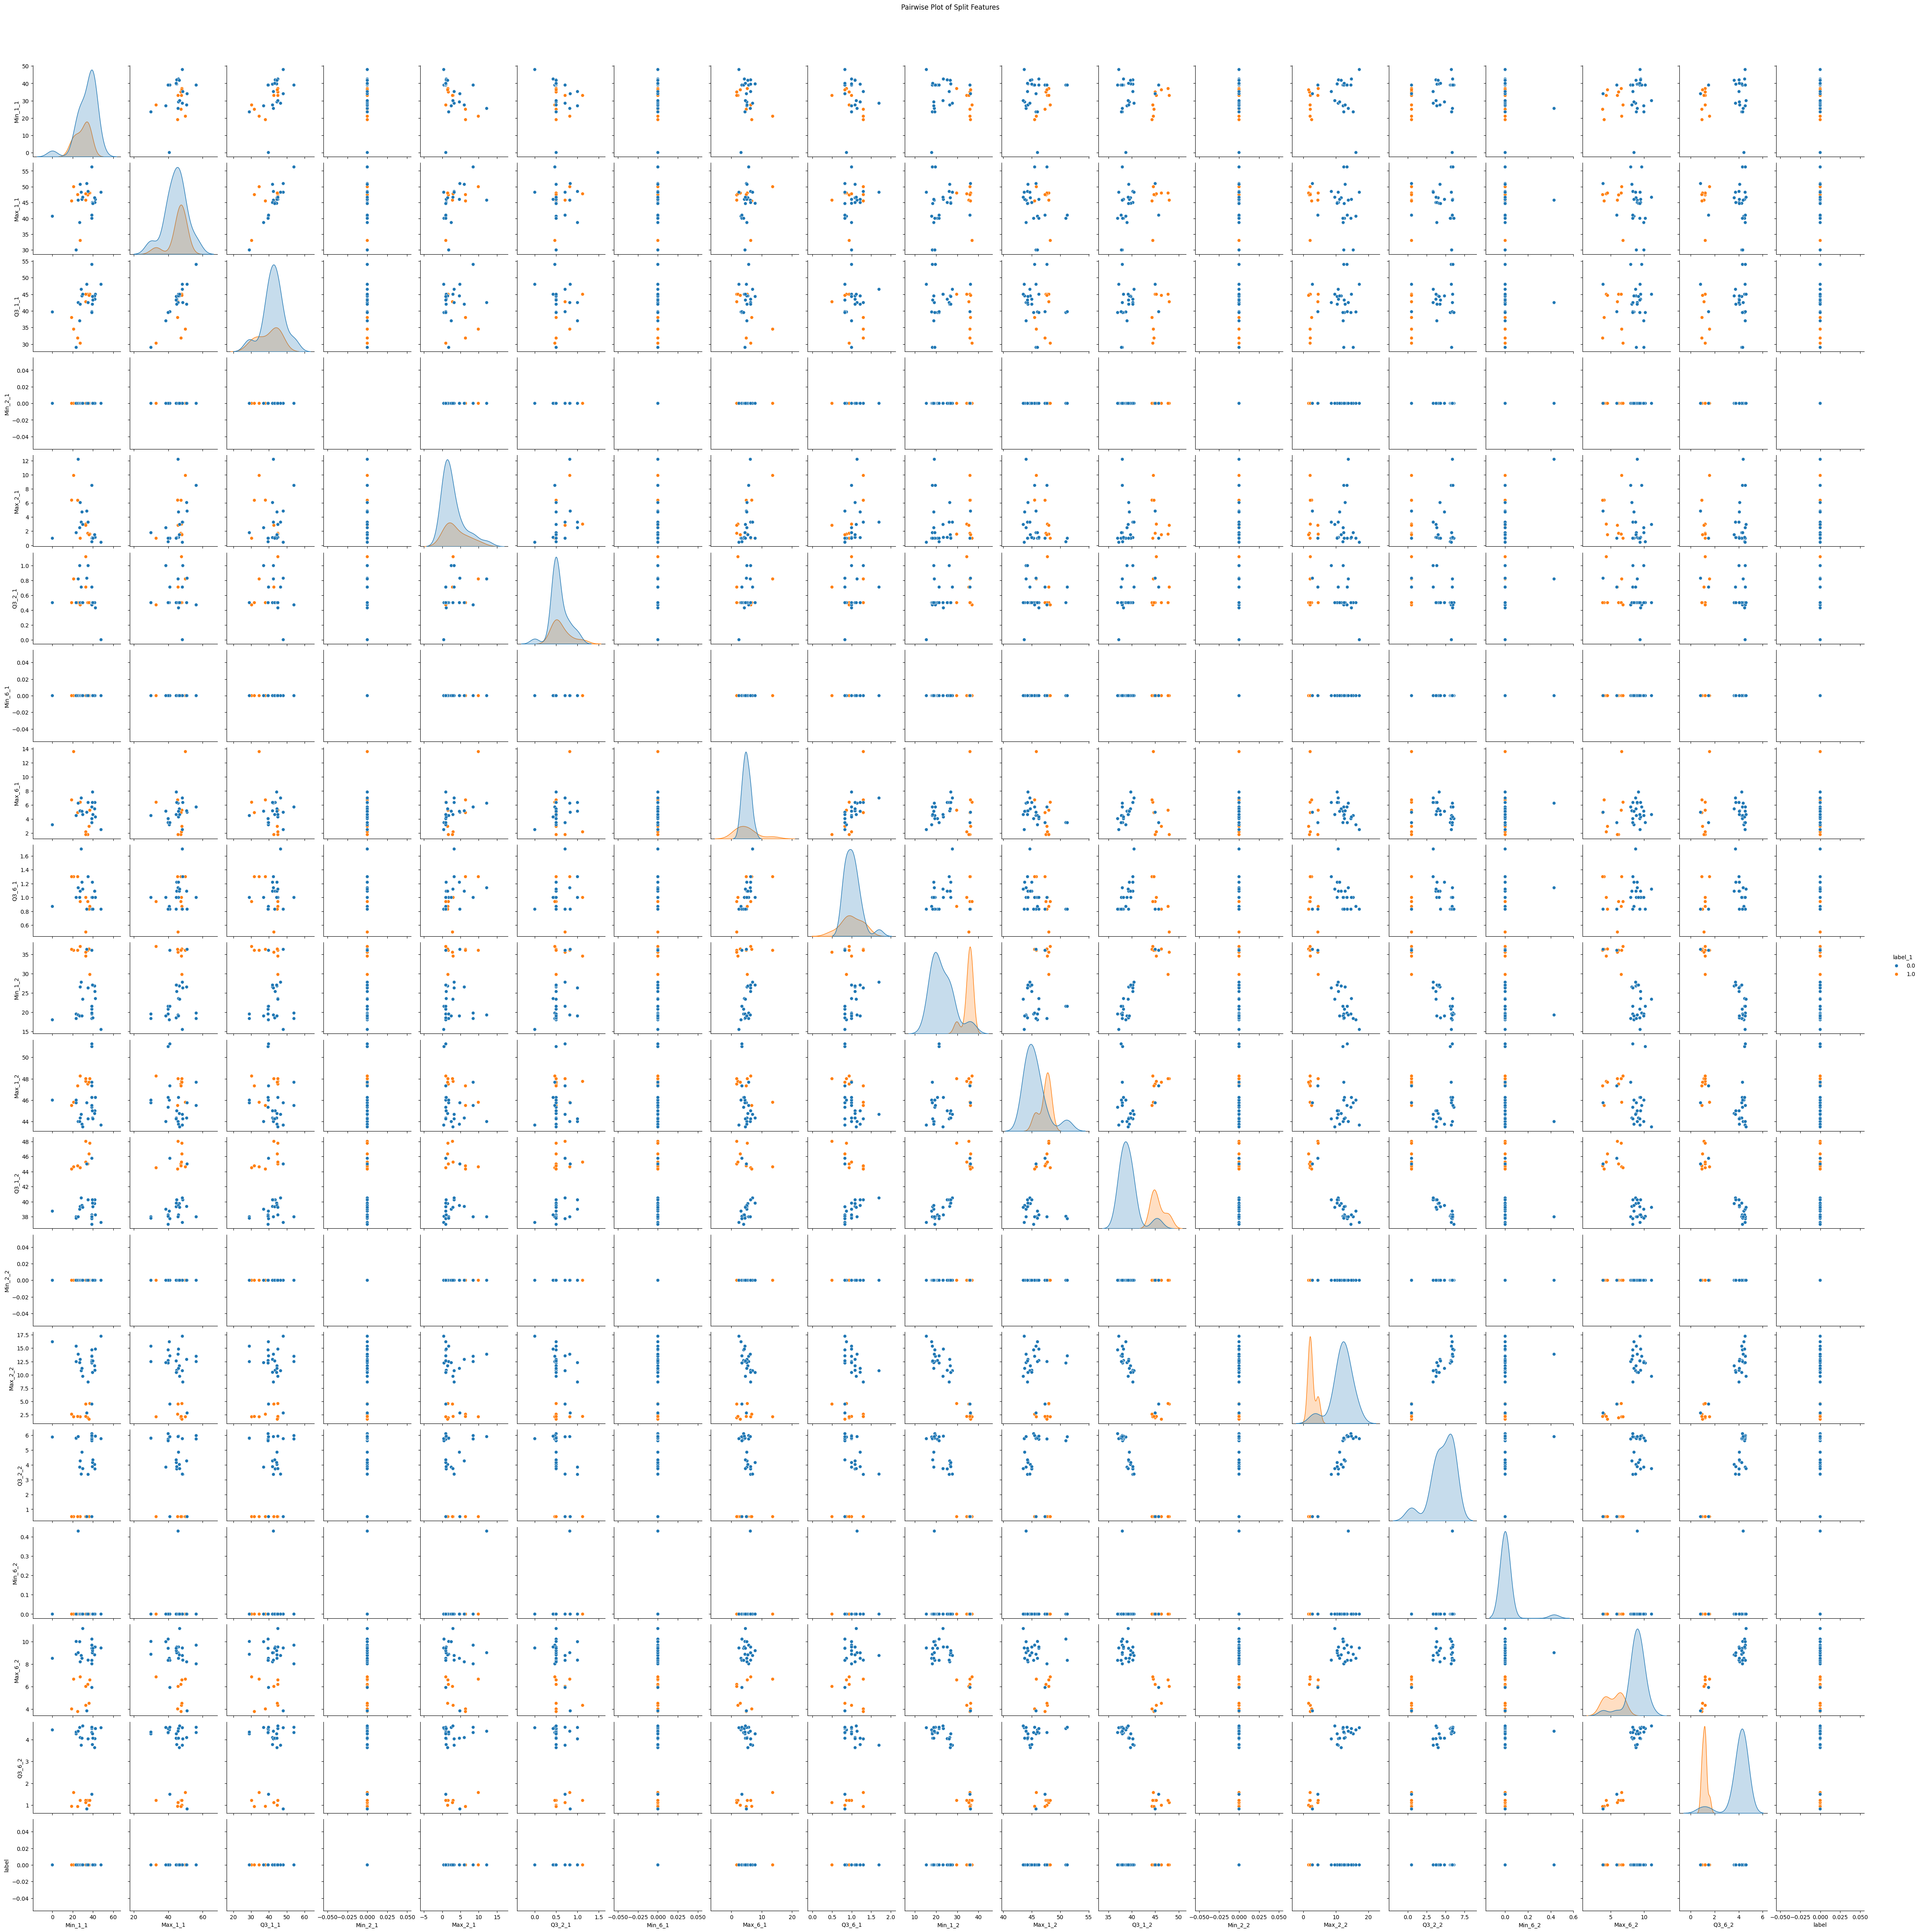

In [9]:
def equal_split(tr_feature_df, series, feat_name):                      # Function to create Equal splitted columns from input dataframe
    split_1_df = tr_feature_df[0:math.floor(len(tr_feature_df)/2)]      # Splitting Part 1
    split_1_df = split_1_df.reset_index(drop=True)
    col_temp = {}                                                       # Initializing empty dict to rename columns
    for s_name in series:
        for feat in feat_name:
            col_temp[feat + "_" + str(s_name)] = (feat + "_" + str(s_name) + "_1")
    col_temp["label"] = "label_1"
    split_1_df = split_1_df.rename(columns=col_temp)
    
    split_2_df = tr_feature_df[math.floor(len(tr_feature_df)/2):]       # Splitting Part 2
    split_2_df = split_2_df.reset_index(drop=True)
    col_temp = {}                                                       # Initializing empty dict to rename columns
    for s_name in series:
        for feat in feat_name:
            col_temp[feat + "_" + str(s_name)] = (feat + "_" + str(s_name) + "_2")
    split_2_df = split_2_df.rename(columns=col_temp)
    
    split_feature_df = pd.concat([split_1_df, split_2_df], axis=1)      # Merging both splits into one dataframe
    return split_feature_df

set = [1, 2, 6]                                                         # The sets we are interested in
imp_features = ['Min', 'Max', 'Q3']                                     # Features significant found in HW3
split_feature_df = equal_split(tr_bend_df, set, imp_features)
split_feature_df

sns.pairplot(split_feature_df, hue="label_1")                           # Plot
plt.suptitle('Pairwise Plot of Split Features', y=1.02)
plt.show()

#### iii. Time Series Segments

In [10]:
def ext_row(double_df, value_of_l):                     # Func for getting rows
    row = []                                            # Empty list to store statistical data
    len = double_df.shape[0] // value_of_l
    rem = double_df.shape[0] % value_of_l
    i, ind = 1, 0
    
    while i <= rem:                                     # Loop to get stat data and append in list
        seg_df = double_df[ind: ind+len+1].describe()
        for j in range(1, 7):
            min = seg_df.loc['min'][j]                  # Stat data
            max = seg_df.loc['max'][j]
            mean = seg_df.loc['mean'][j]
            median = seg_df.loc['50%'][j]
            std = seg_df.loc['std'][j]
            Q1 = seg_df.loc['25%'][j]
            Q3 = seg_df.loc['75%'][j]
            row.append(round(min,2))                   # Appending to list
            row.append(round(max,2))
            row.append(round(mean,2))
            row.append(round(median,2))
            row.append(round(std,2))
            row.append(round(Q1,2))
            row.append(round(Q3,2))
        ind += len + 1
        i += 1                                          # update counter for loop
        
    while i <= value_of_l:                              # Same logic as above block
        seg_df = double_df[ind: ind+len].describe()
        for j in range(1, 7):
            min = seg_df.loc['min'][j]                  # Stat data
            max = seg_df.loc['max'][j]
            mean = seg_df.loc['mean'][j]
            median = seg_df.loc['50%'][j]
            std = seg_df.loc['std'][j]
            Q1 = seg_df.loc['25%'][j]
            Q3 = seg_df.loc['75%'][j]
            row.append(round(min,2))                    # Appending to list
            row.append(round(max,2))
            row.append(round(mean,2))
            row.append(round(median,2))
            row.append(round(std,2))
            row.append(round(Q1,2))
            row.append(round(Q3,2))
        ind += len + 1
        i += 1                                          # Update counter
        
    return row

In [11]:
def ext_lx(tr_files, value_of_l):
    t_feats = {}                                # Empty dict to store time domain features
    for activity, files in tr_files.items():
        for f_path in files:                       # Getting file paths from folders
            lx_df = pd.read_csv(f_path, skiprows=5, header=None)        # Skipping first 5 lines
            row = ext_row(lx_df, value_of_l)
            t_inst = f_path.split('/')                  # Splitting path
            t_feats[t_inst[3] + '/' + t_inst[4]] = row
    feat_df = pd.DataFrame.from_dict(t_feats, orient ='index')      # Saving to dataframe
    cols = []           # empty list for storing column names
    for i in range(1, 6 * value_of_l + 1):      # loop to add suffix to col names
        cols.append('Min_' + str(i))
        cols.append('Max_' + str(i))
        cols.append('Mean_' + str(i))
        cols.append('Median_' + str(i))
        cols.append('Std_' + str(i))
        cols.append('Q1_' + str(i))
        cols.append('Q3_' + str(i))
    feat_df.columns = cols      # rename columns
    return feat_df

In [12]:
results_df = pd.DataFrame(columns=['l_value', 'p_value', 'accuracy'])       # Creating results dataframe to store value
for value_of_l in range(1, 21):             # Loop for L values till 20
    print(f'{value_of_l}/20 done')          
    lx_df = ext_lx(train, value_of_l)
    for ind, row in lx_df.iterrows():
        if 'bending1' in ind or 'bending2' in ind:
            lx_df.at[ind, 'label'] = 1
        else:
            lx_df.at[ind, 'label'] = 0      
    tr_X = lx_df.iloc[:, :-1]
    tr_Y = lx_df.iloc[:, -1]      
    val_temp = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
    lr_mod = LogisticRegression(max_iter=1000)              # upto 1000 iterations of Log regression
    sel_temp_data = RFECV(estimator=lr_mod, scoring='accuracy', cv=val_temp)
    sel_temp_data.fit(tr_X, tr_Y)
    p_value = sel_temp_data.n_features_                                                 # P value
    accuracy_value = round(sel_temp_data.cv_results_['mean_test_score'].max(), 4)       # accuracy score
    temp_df = pd.DataFrame({'l_value': [value_of_l], 'p_value': [p_value], 'accuracy': [accuracy_value]})
    results_df = pd.concat([results_df, temp_df], ignore_index=True)                    # Merging result and temporary dataframe
print('All Done')

1/20 done


C:\Users\kal_u\AppData\Local\Temp\ipykernel_34944\3911896746.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)                    # Merging result and temporary dataframe


2/20 done
3/20 done
4/20 done
5/20 done
6/20 done
7/20 done
8/20 done
9/20 done
10/20 done
11/20 done
12/20 done
13/20 done
14/20 done
15/20 done
16/20 done
17/20 done
18/20 done
19/20 done
20/20 done
All Done


In [13]:
results_df

,l_value,p_value,accuracy
0,1,6,0.9714
1,2,4,0.9571
2,3,7,0.9714
3,4,7,0.9857
4,5,6,0.9857
5,6,18,0.9857
6,7,7,0.9714
7,8,19,0.9714
8,9,3,0.9714
9,10,10,0.9714


#### iv. Confusion Matrix

In [14]:
def tr_mod(lx_df):
    for ind, row in lx_df.iterrows():
        if 'bending1' in ind or 'bending2' in ind:
            lx_df.at[ind, 'label'] = 1
        else:
            lx_df.at[ind, 'label'] = 0
    tr_X = lx_df.iloc[:, :-1]
    tr_Y = lx_df.iloc[:, -1]
    val_temp = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
    lr_mod = LogisticRegression(max_iter=1000)
    sel_temp_data = RFECV(estimator=lr_mod, scoring='accuracy', cv=val_temp)
    sel_temp_data.fit(tr_X, tr_Y)
    return lr_mod, sel_temp_data
value_of_l = 13
int_feat = []
lx_df = ext_lx(train, value_of_l)
lr_mod, selector = tr_mod(lx_df)
for i in range(len(lx_df.columns)-1):
    if selector.support_[i]:
        int_feat.append(lx_df.columns[i])   
print(int_feat)

['Min_9', 'Min_11', 'Mean_11', 'Median_11', 'Q1_11', 'Q1_17', 'Q3_17', 'Min_23', 'Max_37', 'Q3_43', 'Max_49', 'Max_55', 'Min_65', 'Min_71']


In [15]:
tr_X = lx_df[int_feat].to_numpy()
tr_Y = lx_df['label'].to_numpy()
val_of_intercept = sm.add_constant(tr_X)
sm_lr_model = sm.Logit(tr_Y, val_of_intercept).fit(method='bfgs')
sm_lr_model.summary()

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 22
         Function evaluations: 26
         Gradient evaluations: 26


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   69
Model:                          Logit   Df Residuals:                       54
Method:                           MLE   Df Model:                           14
Date:                Tue, 22 Oct 2024   Pseudo R-squ.:                   1.000
Time:                        22:00:20   Log-Likelihood:            -2.7952e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 1.604e-06
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0932   4.24e+04   -2.2e-06      1.000   -8.31e+04    8.31e+04
x1            -0.6829    551.846     -0.001      0.999   -1082.282    1080.916
x2             1.4120   4481.104      0.000      1.000   -8781.391    8784.215
x3             0.2654   3925.526   6.76e-05      1.000   -7693.624    7694.155
x4             0.4071   7345.709   5.54e-05      1.000   -1.44e+04    1.44e+04
x5             0.1376   1492.476   9.22e-05      1.000   -2925.062    2925.337
x6             0.3759   3294.984      0.000      1.000   -6457.674    6458.426
x7             0.2898   2984.540   9.71e-05      1.000   -5849.301    5849.880
x8             0.0820   1099.278   7.46e-05      1.000   -2154.464    2154.628
x9            -0.1711   1078.220     -0.000      1.000   -2113.444    2113.102
x10            0.7229   3511.427      0.000      1.000   -6881.547    6882.993
x11           -1.2405   4679.585     -0.000      1.000   -9173.059    9170.578
x12           -0.7282   2175.331     -0.000      1.000   -4264.299    4262.842
x13            0.3132    356.578      0.001      0.999    -698.567     699.193
x14            0.4760    538.454      0.001      0.999   -1054.873    1055.825
==============================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

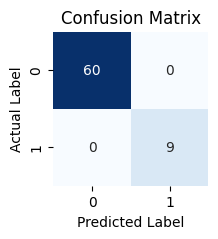

In [16]:
lr_mod.fit(tr_X, tr_Y)
predicted_Y = lr_mod.predict(tr_X)
prob_prediction_Y = lr_mod.predict_proba(tr_X)
cm = confusion_matrix(tr_Y, predicted_Y)

plt.figure(figsize=(2, 2))                                          # Creating Heatmap for Correlation Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [17]:
n_counter = 0                   # Counter variable
for i in range(len(tr_Y)):      # Loop
    if tr_Y[i] == predicted_Y[i]:
        n_counter += 1          # Update counter
cross_validation_accuracy = round(n_counter/len(tr_Y), 4)       # Accuracy score
print("Cross Validation accuracy is " + str(cross_validation_accuracy))

Cross Validation accuracy is 1.0


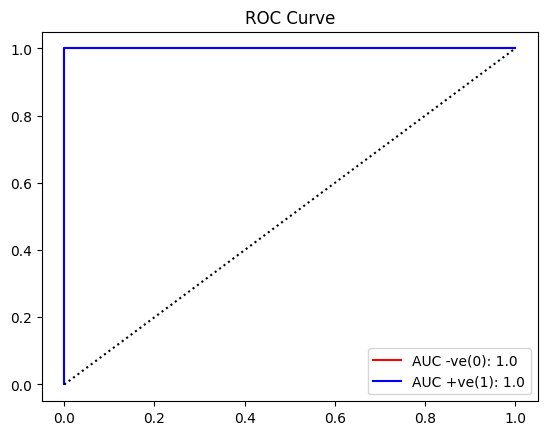

In [18]:
FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(tr_Y,  prob_prediction_Y[::,0], pos_label=0.0)      # Positive class
auc_0 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC -ve(0): ' + str(auc_0), color = 'red')

FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(tr_Y,  prob_prediction_Y[::,1], pos_label=1.0)      # Negative class
auc_1 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC +ve(1): ' + str(auc_1), color = 'blue')

plt.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')        # Plotting ROC curve
plt.legend()
plt.title("ROC Curve")
plt.show()

#### v. Test Classifier

In [19]:
value_of_l = 13
lx_df = ext_lx(test, value_of_l)
for ind, row in lx_df.iterrows():
    if 'bending1' in ind or 'bending2' in ind:
        lx_df.at[ind, 'label'] = 1
    else:
        lx_df.at[ind, 'label'] = 0
X_val_te = lx_df[int_feat]
Y_val_te = lx_df['label'].to_numpy()
X_val_te

,Min_9,Min_11,Mean_11,Median_11,Q1_11,Q1_17,Q3_17,Min_23,Max_37,Q3_43,Max_49,Max_55,Min_65,Min_71
bending1/dataset1.csv,4.00,32.50,33.33,33.00,33.00,33.75,35.25,33.67,40.50,39.50,39.50,39.67,29.75,29.25
bending1/dataset2.csv,16.75,30.75,32.95,33.00,33.00,33.00,36.00,33.00,42.50,42.00,42.00,45.50,29.25,28.00
bending2/dataset1.csv,11.00,18.25,26.22,27.00,26.25,26.25,27.00,15.20,27.33,23.75,24.00,24.50,10.67,16.50
bending2/dataset2.csv,17.00,13.00,15.58,15.67,15.00,17.33,19.00,16.50,31.00,28.75,27.00,37.50,3.00,12.00
lying/dataset1.csv,0.00,5.75,10.32,11.00,9.50,8.50,9.00,7.50,28.33,27.25,28.50,30.00,0.00,5.50
lying/dataset2.csv,2.50,2.33,8.07,8.50,6.75,7.33,11.00,1.00,48.33,48.00,48.00,48.00,0.00,1.00
lying/dataset3.csv,5.33,1.00,3.44,4.00,2.75,3.50,5.00,2.50,48.25,48.00,48.00,48.00,9.25,9.75
sitting/dataset1.csv,8.67,2.00,9.06,9.50,5.00,8.60,13.00,5.00,44.00,43.50,43.67,43.50,2.33,5.33
sitting/dataset2.csv,1.50,13.25,16.93,17.25,14.50,14.50,20.50,19.50,47.00,46.50,46.75,46.67,13.50,3.00
sitting/dataset3.csv,4.50,15.00,19.48,18.25,17.25,19.75,24.00,8.50,46.00,45.50,45.25,45.00,13.00,13.00


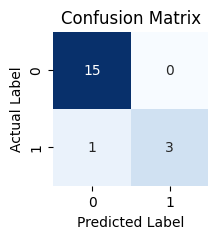

In [20]:
test_pred_Y = lr_mod.predict(X_val_te.to_numpy())
prob_prediction_test_Y = lr_mod.predict_proba(X_val_te.to_numpy())
cm_2 = confusion_matrix(Y_val_te, test_pred_Y)

plt.figure(figsize=(2, 2))                                          # Creating Heatmap for Correlation Matrix
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [21]:
n_counter = 0       # Counter variable
for i in range(len(Y_val_te)):          # Loop
    if Y_val_te[i] == test_pred_Y[i]:
        n_counter += 1              # Update counter
val_te_acc = round(n_counter/len(Y_val_te), 4)      # Accuracy score
print("Test accuracy is " + str(val_te_acc))

Test accuracy is 0.9474


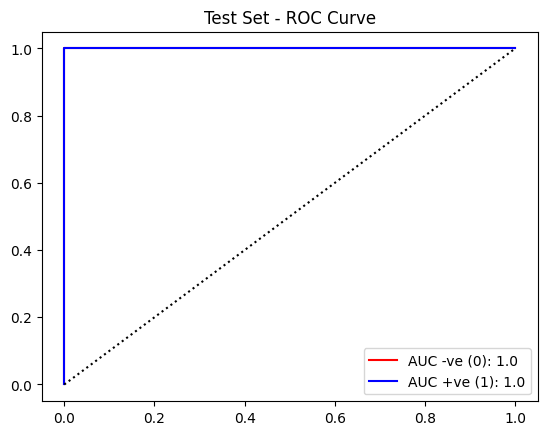

In [22]:
FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(Y_val_te,  prob_prediction_test_Y[::,0], pos_label=0.0)     # Negative Class
test_auc_0 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC -ve (0): ' + str(test_auc_0), color = 'red')

FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(Y_val_te,  prob_prediction_test_Y[::,1], pos_label=1.0)         # Positive Class
test_auc_1 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC +ve (1): ' + str(test_auc_1), color = 'blue')

plt.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')        # Plotting ROC curve
plt.legend()
plt.title("Test Set - ROC Curve")
plt.show()

#### vi. Separation

Yes, the classes are 'Well-Seperated' because the p-values are 1 for estimators.

#### vii. Imbalance

Yes there are imblanced classes because bending has less rows than non-bending

In [23]:
def c_control(input_dataset, l_val):            # Func for case control data
    input_dataset_df = ext_lx(input_dataset, l_val)
    for ind, row in input_dataset_df.iterrows():
        if 'bending1' in ind or 'bending2' in ind:
            input_dataset_df.at[ind, 'label'] = 1
        else:
            input_dataset_df.at[ind, 'label'] = 0 
    bend_df = input_dataset_df.loc[input_dataset_df['label'] == 1.0]
    nonbend_df = input_dataset_df.loc[input_dataset_df['label'] == 0.0]
    bend_df = resample(bend_df, replace=True, n_samples=60, random_state=60)
    c_control_df = pd.concat([bend_df, nonbend_df])
    return c_control_df

In [24]:
results2_df = pd.DataFrame(columns=['l_value', 'p_value', 'accuracy'])      # Creating dataframe to store result
for value_of_l in range(1, 21):                 # Loop for L values till 20
    print(f'{value_of_l}/20 done')
    tr_c_control_df = c_control(train, value_of_l)
    tr_X = tr_c_control_df.iloc[:, :-1]
    tr_Y = tr_c_control_df.iloc[:, -1]
    val_temp = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
    lr_mod = LogisticRegression(max_iter=400)
    sel_temp_data = RFECV(estimator=lr_mod, scoring='accuracy', cv=val_temp)
    sel_temp_data.fit(tr_X, tr_Y)
    p_value = sel_temp_data.n_features_         # P values
    accuracy_value = round(sel_temp_data.cv_results_['mean_test_score'].max(), 4)           # Accuracy score
    temp2_df = pd.DataFrame({'l_value': [value_of_l], 'p_value': [p_value], 'accuracy': [accuracy_value]})
    results2_df = pd.concat([results_df, temp2_df], ignore_index=True)          # Adding results to dataframe
print('All Done')

1/20 done
2/20 done
3/20 done
4/20 done
5/20 done
6/20 done
7/20 done
8/20 done
9/20 done
10/20 done
11/20 done
12/20 done
13/20 done
14/20 done
15/20 done
16/20 done
17/20 done
18/20 done
19/20 done
20/20 done
All Done


In [25]:
results2_df

,l_value,p_value,accuracy
0,1,6,0.9714
1,2,4,0.9571
2,3,7,0.9714
3,4,7,0.9857
4,5,6,0.9857
5,6,18,0.9857
6,7,7,0.9714
7,8,19,0.9714
8,9,3,0.9714
9,10,10,0.9714


In [26]:
value_of_l = 1
int_feat = []
tr_c_control_df = c_control(train, value_of_l)
tr_X = tr_c_control_df.iloc[:, :-1]
tr_Y = tr_c_control_df.iloc[:, -1]

val_temp = StratifiedKFold(n_splits = 5, shuffle=True, random_state=69)
lr_mod = LogisticRegression(max_iter=400)
sel_temp_data = RFECV(estimator=lr_mod, scoring='accuracy', cv=val_temp)
sel_temp_data.fit(tr_X, tr_Y)
for i in range(len(tr_c_control_df.columns)-1):
    if sel_temp_data.support_[i]:
        int_feat.append(tr_c_control_df.columns[i])
int_feat

['Q1_3', 'Min_5', 'Max_5']

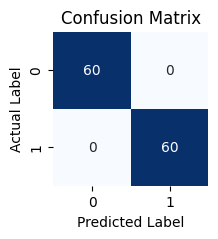

In [27]:
tr_X = tr_c_control_df[int_feat].to_numpy()
tr_Y = tr_c_control_df['label'].to_numpy()
lr_mod.fit(tr_X, tr_Y)
predicted_Y = lr_mod.predict(tr_X)
prob_prediction_Y = lr_mod.predict_proba(tr_X)
cm3 = confusion_matrix(tr_Y, predicted_Y)

plt.figure(figsize=(2, 2))                                      # Creating Heatmap for Correlation Matrix
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

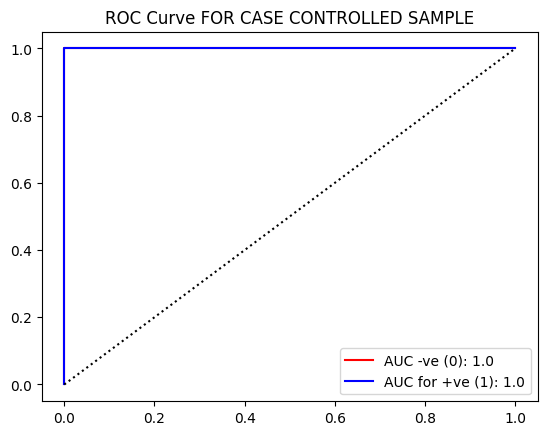

In [28]:
FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(tr_Y,  prob_prediction_Y[::,0], pos_label=0.0)      # Negative Class
auc_0 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC -ve (0): ' + str(auc_0), color = 'red')

FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(tr_Y,  prob_prediction_Y[::,1], pos_label=1.0)      # Positive Class
auc_1 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC for +ve (1): ' + str(auc_1), color = 'blue')

plt.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')        # Plotting ROC curve
plt.legend()
plt.title("ROC Curve FOR CASE CONTROLLED SAMPLE")
plt.show()

In [29]:
value_of_l = 1
lx_df = ext_lx(test, value_of_l)
for ind, row in lx_df.iterrows():
    if 'bending1' in ind or 'bending2' in ind:
        lx_df.at[ind, 'label'] = 1
    else:
        lx_df.at[ind, 'label'] = 0
X_val_te = lx_df[int_feat]
Y_val_te = lx_df['label'].to_numpy()
X_val_te

,Q1_3,Min_5,Max_5
bending1/dataset1.csv,16.00,27.25,38.25
bending1/dataset2.csv,19.00,27.67,38.50
bending2/dataset1.csv,18.00,10.67,30.00
bending2/dataset2.csv,18.00,0.00,33.00
lying/dataset1.csv,3.50,0.00,21.00
lying/dataset2.csv,5.67,0.00,12.75
lying/dataset3.csv,3.00,0.00,12.00
sitting/dataset1.csv,15.00,1.00,28.00
sitting/dataset2.csv,15.00,2.00,24.00
sitting/dataset3.csv,10.00,4.75,26.75


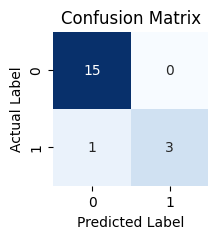

In [30]:
test_pred_Y = lr_mod.predict(X_val_te.to_numpy())
prob_prediction_test_Y = lr_mod.predict_proba(X_val_te.to_numpy())
cm4 = confusion_matrix(Y_val_te, test_pred_Y)

plt.figure(figsize=(2, 2))                                      # Creating Heatmap for Correlation Matrix
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

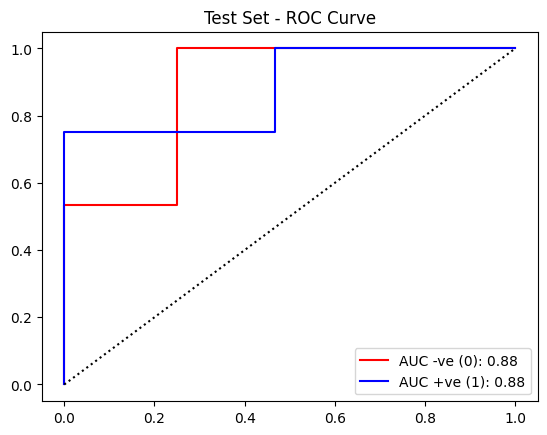

In [31]:
FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(Y_val_te,  prob_prediction_test_Y[::,0], pos_label=0.0)     # Negative Class
test_auc_0 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC -ve (0): ' + str(test_auc_0), color = 'red')

FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(Y_val_te,  prob_prediction_test_Y[::,1], pos_label=1.0)     # Positive Class
test_auc_1 = round(auc(FPR_temp_val, TPR_temp_val), 2)
plt.plot(FPR_temp_val, TPR_temp_val, label='AUC +ve (1): ' + str(test_auc_1), color = 'blue')

plt.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')        # Plotting ROC curve
plt.legend()
plt.title("Test Set - ROC Curve")
plt.show()

### (b) Binary Classification Using L1-penalized logistic regression

#### i. Time Series Segments

In [32]:
results3_df = pd.DataFrame(columns=['l_value', 'accuracy'])     # Creating Dataframe to store results
opt_value_of_L = -1
max_acc = -1

for value_of_l in range(1, 21):         # Loop for L values till 20
    tr_df_lx = ext_lx(train, value_of_l)
    te_df_lx = ext_lx(test, value_of_l)
    for ind, row in tr_df_lx.iterrows():
        if 'bending1' in ind or 'bending2' in ind:
            tr_df_lx.at[ind, 'label'] = 1
        else:
            tr_df_lx.at[ind, 'label'] = 0
    for ind, row in te_df_lx.iterrows():
        if 'bending1' in ind or 'bending2' in ind:
            te_df_lx.at[ind, 'label'] = 1
        else:
            te_df_lx.at[ind, 'label'] = 0

    tr_X = tr_df_lx.iloc[:, :-1]
    tr_Y = tr_df_lx.iloc[:, -1]
    X_val_te = te_df_lx.iloc[:, :-1]
    Y_val_te = te_df_lx.iloc[:, -1]

    model = LogisticRegressionCV(cv=5, max_iter=500, penalty='l1', solver='liblinear', scoring='accuracy', random_state=69)     # Log regression
    model.fit(tr_X, tr_Y)               # Fitting the model

    tr_accuracy = round(model.score(tr_X, tr_Y), 4)     # Training accuracy score
    val_te_acc = round(model.score(X_val_te, Y_val_te), 4)      # Test accuracy score

    print(f'{value_of_l}/20 done')
    temp_df3 = pd.DataFrame({'l_value': [value_of_l], 'accuracy': [val_te_acc]})
    results3_df = pd.concat([results3_df, temp_df3], ignore_index=True)     # Adding results to dataframe
    if val_te_acc > max_acc:
        max_acc = val_te_acc        # Finding maximum accuracy and the optimal L value
        opt_value_of_L = value_of_l
print(f'Optimal L-value: {opt_value_of_L}, corresponding test accuracy: {max_acc}')

1/20 done


C:\Users\kal_u\AppData\Local\Temp\ipykernel_34944\899228506.py:32: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results3_df = pd.concat([results3_df, temp_df3], ignore_index=True)     # Adding results to dataframe


2/20 done
3/20 done
4/20 done
5/20 done
6/20 done
7/20 done
8/20 done
9/20 done
10/20 done
11/20 done
12/20 done
13/20 done
14/20 done
15/20 done
16/20 done
17/20 done
18/20 done
19/20 done
20/20 done
Optimal L-value: 1, corresponding test accuracy: 1.0


In [33]:
results3_df

,l_value,accuracy
0,1,1.0000
1,2,1.0000
2,3,1.0000
3,4,0.9474
4,5,0.9474
5,6,0.9474
6,7,1.0000
7,8,0.9474
8,9,0.9474
9,10,0.9474


#### ii. Comparison

L1-penalized is better. L value of 2 was found to be best. Test accuracy remained similar using p-values.

### (c) Multi-class Classification (The Realistic Case)

#### i. Time Series Segments

In [34]:
results4_df = pd.DataFrame(columns=['l_value', 'accuracy'])     # Creating dataframe to store results
opt_value_of_L = -1
max_acc = -1

for value_of_l in range(1, 21):         # Loop for L values till 20
    warnings.filterwarnings("ignore")       # Ignoring Warning when max iter is not reached for some cases
    tr_df_lx = ext_lx(train, value_of_l)
    te_df_lx = ext_lx(test, value_of_l)

    for ind, row in tr_df_lx.iterrows():
        tr_df_lx.at[ind, 'label'] = ind.split("/")[0]

    for ind, row in te_df_lx.iterrows():
        te_df_lx.at[ind, 'label'] = ind.split("/")[0]

    tr_X = tr_df_lx.iloc[:, :-1]
    tr_Y = tr_df_lx.iloc[:, -1]
    X_val_te = te_df_lx.iloc[:, :-1]
    Y_val_te = te_df_lx.iloc[:, -1]

    model = LogisticRegressionCV(cv=4, solver='saga', max_iter= 100, penalty='l1', scoring='accuracy', random_state=69)     # Log regression
    model.fit(tr_X, tr_Y)       # Fitting model

    tr_accuracy = round(model.score(tr_X, tr_Y), 4)     # Train accuracy score
    val_te_acc = round(model.score(X_val_te, Y_val_te), 4)      # Test accuracy value found
    
    print(f'{value_of_l}/20 done')
    temp_df4 = pd.DataFrame({'l_value': [value_of_l], 'accuracy': [val_te_acc]})           #Adding result to temporary dataframe first 
    results4_df = pd.concat([results4_df, temp_df4], ignore_index=True)                     # Merging with result dataframe
    
    if val_te_acc > max_acc:            # Loop to find Optimal Value of L with max accuracy
        max_acc = val_te_acc
        opt_value_of_L = value_of_l
print(f'Optimal L-value: {opt_value_of_L}, corresponding test accuracy: {max_acc}')
print("Test Error is " + str(round(1-max_acc, 4)))

1/20 done
2/20 done
3/20 done
4/20 done
5/20 done
6/20 done
7/20 done
8/20 done
9/20 done
10/20 done
11/20 done
12/20 done
13/20 done
14/20 done
15/20 done
16/20 done
17/20 done
18/20 done
19/20 done
20/20 done
Optimal L-value: 2, corresponding test accuracy: 0.9474
Test Error is 0.0526


In [35]:
results4_df

,l_value,accuracy
0,1,0.8947
1,2,0.9474
2,3,0.8421
3,4,0.8947
4,5,0.8421
5,6,0.7895
6,7,0.7895
7,8,0.8421
8,9,0.7895
9,10,0.8421


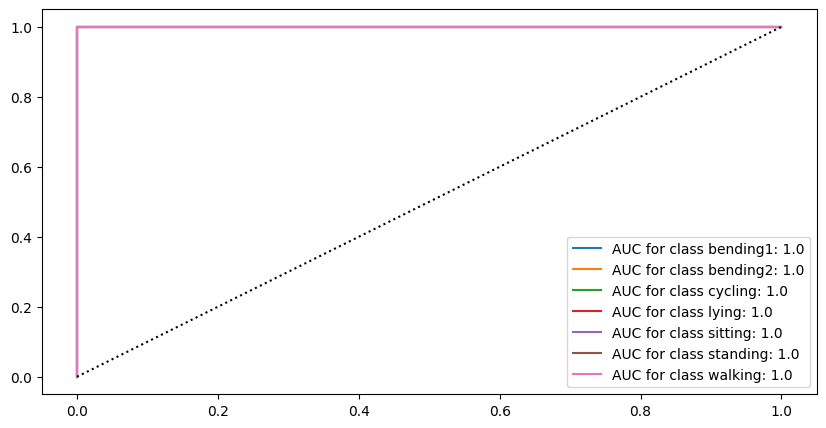

In [36]:
value_of_l = 2
warnings.filterwarnings("ignore")
tr_df_lx = ext_lx(train, value_of_l)
te_df_lx = ext_lx(test, value_of_l)

for ind, row in tr_df_lx.iterrows():
    tr_df_lx.at[ind, 'label'] = ind.split("/")[0]
for ind, row in te_df_lx.iterrows():
    te_df_lx.at[ind, 'label'] = ind.split("/")[0]

tr_X = tr_df_lx.iloc[:, :-1]
tr_Y = tr_df_lx.iloc[:, -1]
X_val_te = te_df_lx.iloc[:, :-1]
Y_val_te = te_df_lx.iloc[:, -1]

model = LogisticRegressionCV(cv=4, solver='saga', max_iter=100, penalty='l1', scoring='accuracy', random_state=69)      # Log regression
model.fit(tr_X, tr_Y)               # Fitting model

tr_predicted_Y = model.predict(tr_X.to_numpy())
prob_tr_predicted_Y = model.predict_proba(tr_X.to_numpy())
confusion_matrix(tr_Y, tr_predicted_Y)

cl = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
for i in range(len(cl)):
    FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(tr_Y,  prob_tr_predicted_Y[::,i], pos_label=cl[i])
    auc_val = round(auc(FPR_temp_val, TPR_temp_val), 2)
    axes.plot(FPR_temp_val, TPR_temp_val, label='AUC for class ' + str(cl[i]) + ': ' + str(auc_val))
axes.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')                                                              # Plotting ROC curve
axes.legend()
plt.show()

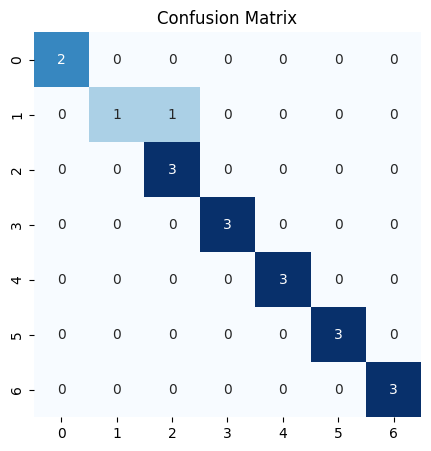

In [37]:
te_predicted_Y = model.predict(X_val_te.to_numpy())
prob_te_predictied_Y = model.predict_proba(X_val_te.to_numpy())
cm5 = confusion_matrix(Y_val_te, te_predicted_Y)
plt.figure(figsize=(5, 5))                                          # Creating Heatmap for Correlation Matrix
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

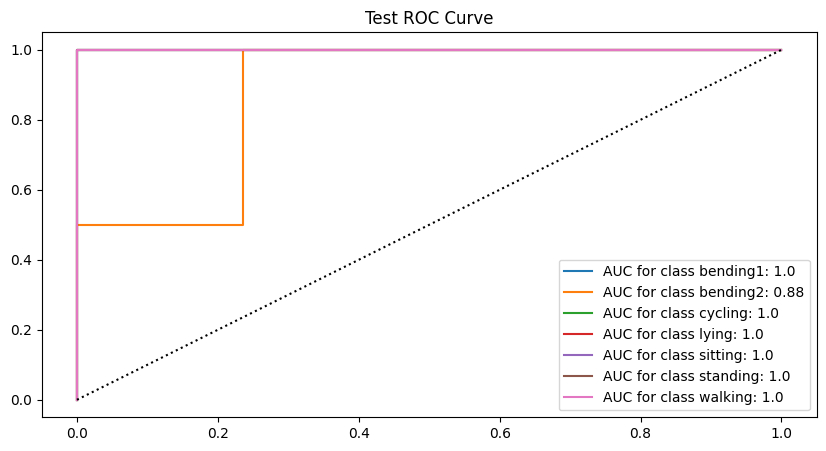

In [38]:
cl = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Test ROC Curve")
for i in range(len(cl)):
    FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(Y_val_te,  prob_te_predictied_Y[::,i], pos_label=cl[i])
    auc_val = round(auc(FPR_temp_val, TPR_temp_val), 2)
    axes.plot(FPR_temp_val, TPR_temp_val, label='AUC for class ' + str(cl[i]) + ': ' + str(auc_val))
axes.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')                                      # Plotting ROC curve
axes.legend()
plt.show()

#### ii. Naive Bayes

In [39]:
results5_df = pd.DataFrame(columns=['l_value', 'accuracy'])         # Creating dataframe to store results
opt_value_of_L = -1
max_acc = -1

for value_of_l in range(1, 21):                     # Loop for L values till 20
    tr_df_lx = ext_lx(train, value_of_l)
    te_df_lx = ext_lx(test, value_of_l)
    for ind, row in tr_df_lx.iterrows():
        tr_df_lx.at[ind, 'label'] = ind.split("/")[0]
    for ind, row in te_df_lx.iterrows():
        te_df_lx.at[ind, 'label'] = ind.split("/")[0]

    tr_X = tr_df_lx.iloc[:, :-1]
    tr_Y = tr_df_lx.iloc[:, -1]
    X_val_te = te_df_lx.iloc[:, :-1]
    Y_val_te = te_df_lx.iloc[:, -1]

    model = GaussianNB()            # Using Gaussian Model to fit on data
    model.fit(tr_X, tr_Y)
    tr_accuracy = round(model.score(tr_X, tr_Y), 4)         # Train accuracy score      and Test Accuracy score
    val_te_acc = round(model.score(X_val_te, Y_val_te), 4)

    print(f'{value_of_l}/20 done')
    temp_df5 = pd.DataFrame({'l_value': [value_of_l], 'accuracy': [val_te_acc]})
    results5_df = pd.concat([results5_df, temp_df5], ignore_index=True)         # Saving data to results dataframe
    
    if val_te_acc > max_acc:        # LOOP TO find the max value of Accuracy score and get the associated Optiamal L value
        max_acc = val_te_acc
        opt_value_of_L = value_of_l
print(f'Optimal L-value: {opt_value_of_L}, corresponding test accuracy: {max_acc}')

1/20 done
2/20 done
3/20 done
4/20 done
5/20 done
6/20 done
7/20 done
8/20 done
9/20 done
10/20 done
11/20 done
12/20 done
13/20 done
14/20 done
15/20 done
16/20 done
17/20 done
18/20 done
19/20 done
20/20 done
Optimal L-value: 1, corresponding test accuracy: 0.8947


In [40]:
results5_df

,l_value,accuracy
0,1,0.8947
1,2,0.6316
2,3,0.7368
3,4,0.7895
4,5,0.7368
5,6,0.6842
6,7,0.6842
7,8,0.7368
8,9,0.7895
9,10,0.6842


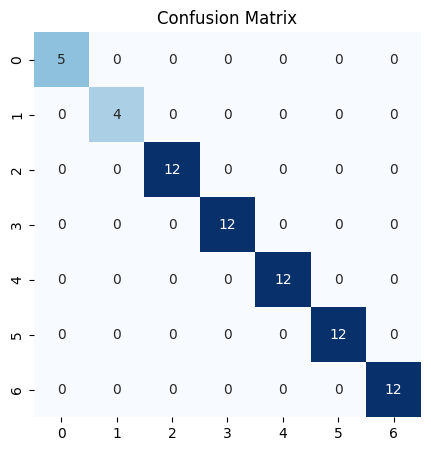

In [41]:
value_of_l = 1
tr_df_lx = ext_lx(train, value_of_l)
te_df_lx = ext_lx(test, value_of_l)
for ind, row in tr_df_lx.iterrows():
    tr_df_lx.at[ind, 'label'] = ind.split("/")[0]
for ind, row in te_df_lx.iterrows():
    te_df_lx.at[ind, 'label'] = ind.split("/")[0]
tr_X = tr_df_lx.iloc[:, :-1]
tr_Y = tr_df_lx.iloc[:, -1]
X_val_te = te_df_lx.iloc[:, :-1]
Y_val_te = te_df_lx.iloc[:, -1]
model = GaussianNB()
model.fit(tr_X, tr_Y)
tr_predicted_Y = model.predict(tr_X.to_numpy())
prob_tr_predicted_Y = model.predict_proba(tr_X.to_numpy())

cm6 = confusion_matrix(tr_Y, tr_predicted_Y)
plt.figure(figsize=(5, 5))                                      # Creating Heatmap for Correlation Matrix
sns.heatmap(cm6, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

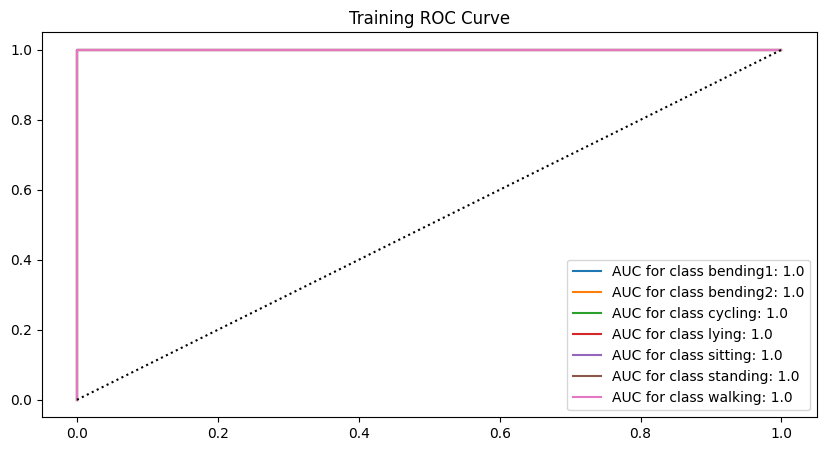

In [42]:
cl = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Training ROC Curve")
for i in range(len(cl)):
    FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(tr_Y,  prob_tr_predicted_Y[::,i], pos_label=cl[i])
    auc_val = round(auc(FPR_temp_val, TPR_temp_val), 2)
    axes.plot(FPR_temp_val, TPR_temp_val, label='AUC for class ' + str(cl[i]) + ': ' + str(auc_val))
axes.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')       # Plotting ROC curve
axes.legend()
plt.show()

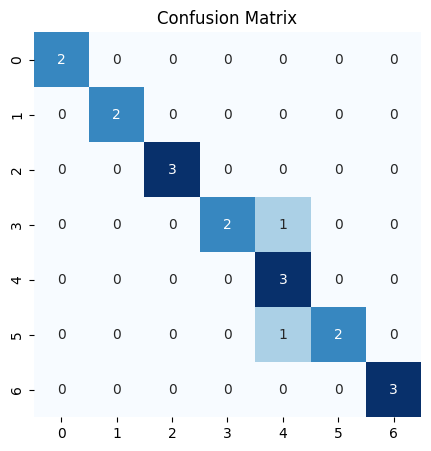

In [43]:
te_predicted_Y = model.predict(X_val_te.to_numpy())
prob_te_predictied_Y = model.predict_proba(X_val_te.to_numpy())
cm7 = confusion_matrix(Y_val_te, te_predicted_Y)
plt.figure(figsize=(5, 5))                                          # Creating Heatmap for Correlation Matrix
sns.heatmap(cm7, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

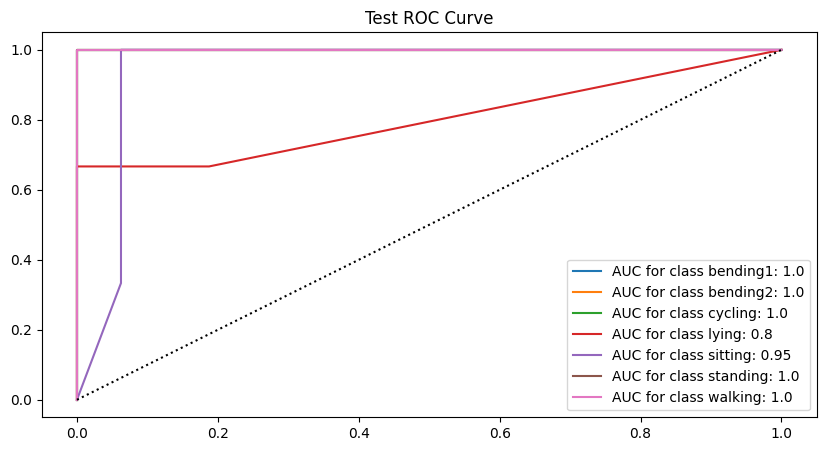

In [44]:
cl = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Test ROC Curve")
for i in range(len(cl)):
    FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(Y_val_te,  prob_te_predictied_Y[::,i], pos_label=cl[i])
    auc_val = round(auc(FPR_temp_val, TPR_temp_val), 2)
    axes.plot(FPR_temp_val, TPR_temp_val, label='AUC for class ' + str(cl[i]) + ': ' + str(auc_val))
axes.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')       # Plotting ROC curve
axes.legend()
plt.show()

# Multinominal

In [45]:
results6_df = pd.DataFrame(columns=['l_value', 'accuracy'])         # Result dataframe
opt_value_of_L = -1
max_acc = -1

for value_of_l in range(1, 21):         # LOOP over L values till 20
    tr_df_lx = ext_lx(train, value_of_l)
    te_df_lx = ext_lx(test, value_of_l)
    for ind, row in tr_df_lx.iterrows():
        tr_df_lx.at[ind, 'label'] = ind.split("/")[0]
    for ind, row in te_df_lx.iterrows():
        te_df_lx.at[ind, 'label'] = ind.split("/")[0]

    tr_X = tr_df_lx.iloc[:, :-1]
    tr_Y = tr_df_lx.iloc[:, -1]
    X_val_te = te_df_lx.iloc[:, :-1]
    Y_val_te = te_df_lx.iloc[:, -1]

    model = MultinomialNB()     # Using Multinominal model
    model.fit(tr_X, tr_Y)
    tr_accuracy = round(model.score(tr_X, tr_Y), 4)     # Train accuracy
    val_te_acc = round(model.score(X_val_te, Y_val_te), 4)      # Test accuracy
    print(f'{value_of_l}/20 done')
    temp_df6 = pd.DataFrame({'l_value': [value_of_l], 'accuracy': [val_te_acc]})
    results6_df = pd.concat([results6_df, temp_df6], ignore_index=True)         # Adding data to results dataframe
    
    if val_te_acc > max_acc:            # Loop to get optimal L value with maximum accuracy
        max_acc = val_te_acc
        opt_value_of_L = value_of_l
print(f'Optimal L-value: {opt_value_of_L}, corresponding test accuracy: {max_acc}')

1/20 done
2/20 done
3/20 done
4/20 done
5/20 done
6/20 done
7/20 done
8/20 done
9/20 done
10/20 done
11/20 done
12/20 done
13/20 done
14/20 done
15/20 done
16/20 done
17/20 done
18/20 done
19/20 done
20/20 done
Optimal L-value: 1, corresponding test accuracy: 0.8947


In [46]:
results6_df

,l_value,accuracy
0,1,0.8947
1,2,0.7368
2,3,0.7895
3,4,0.7895
4,5,0.7368
5,6,0.7368
6,7,0.7368
7,8,0.7368
8,9,0.7368
9,10,0.7368


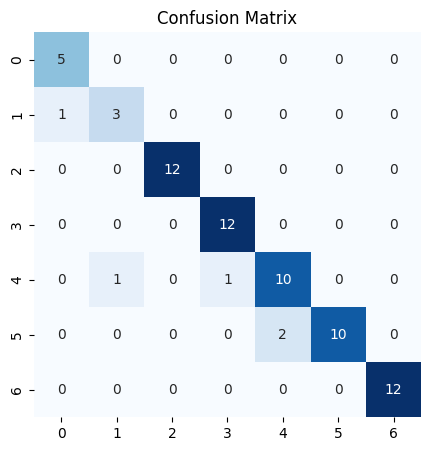

In [47]:
value_of_l = 1
tr_df_lx = ext_lx(train, value_of_l)
te_df_lx = ext_lx(test, value_of_l)
for ind, row in tr_df_lx.iterrows():
    tr_df_lx.at[ind, 'label'] = ind.split("/")[0]
for ind, row in te_df_lx.iterrows():
    te_df_lx.at[ind, 'label'] = ind.split("/")[0]
tr_X = tr_df_lx.iloc[:, :-1]
tr_Y = tr_df_lx.iloc[:, -1]
X_val_te = te_df_lx.iloc[:, :-1]
Y_val_te = te_df_lx.iloc[:, -1]
model = MultinomialNB()
model.fit(tr_X, tr_Y)
tr_predicted_Y = model.predict(tr_X.to_numpy())
prob_tr_predicted_Y = model.predict_proba(tr_X.to_numpy())

cm8 = confusion_matrix(tr_Y, tr_predicted_Y)
plt.figure(figsize=(5, 5))      # Creating Heatmap for Correlation Matrix
sns.heatmap(cm8, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

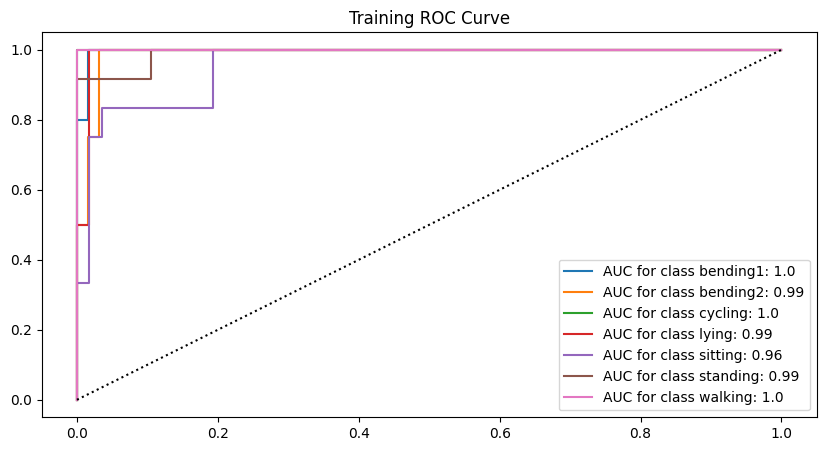

In [48]:
cl = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Training ROC Curve")
for i in range(len(cl)):
    FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(tr_Y,  prob_tr_predicted_Y[::,i], pos_label=cl[i])
    auc_val = round(auc(FPR_temp_val, TPR_temp_val), 2)
    axes.plot(FPR_temp_val, TPR_temp_val, label='AUC for class ' + str(cl[i]) + ': ' + str(auc_val))
axes.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')       # Plotting ROC curve
axes.legend()
plt.show()

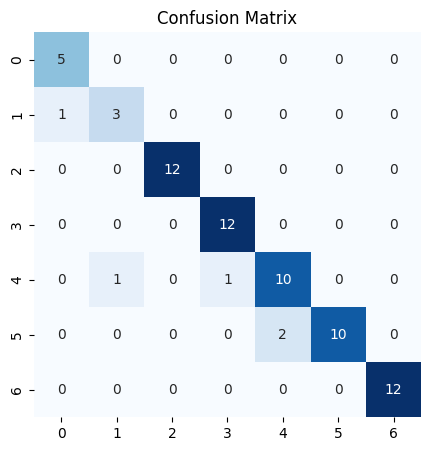

In [49]:
te_predicted_Y = model.predict(X_val_te.to_numpy())
prob_te_predictied_Y = model.predict_proba(X_val_te.to_numpy())

cm9 = confusion_matrix(Y_val_te, te_predicted_Y)
plt.figure(figsize=(5, 5))  # Creating Heatmap for Correlation Matrix
sns.heatmap(cm8, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

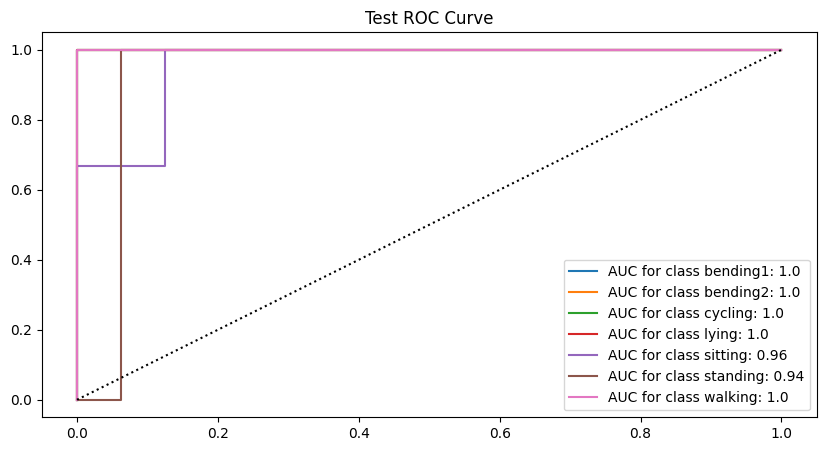

In [50]:
cl = model.classes_
fig, axes = plt.subplots(figsize=(10, 5))
axes.set_title("Test ROC Curve")
for i in range(len(cl)):
    FPR_temp_val, TPR_temp_val, thresholds_temp_val = metrics.roc_curve(Y_val_te,  prob_te_predictied_Y[::,i], pos_label=cl[i])
    auc_val = round(auc(FPR_temp_val, TPR_temp_val), 2)
    axes.plot(FPR_temp_val, TPR_temp_val, label='AUC for class ' + str(cl[i]) + ': ' + str(auc_val))
axes.plot([0, 1], [0, 1], linestyle='dotted', color = 'black')          # Plotting ROC curve
axes.legend()
plt.show()

#### ii. Comparison

Multinomial logistic regression got best result among all 3 models, in terms of accuracy scores on test data.

## 3. ISLR 4.8.3

![islr_4_8_3.jpg](./islr_4_8_3.jpg)

## 4. ISLR 4.8.7

![islr_4_8_7.jpg](./islr_4_8_7.jpg)